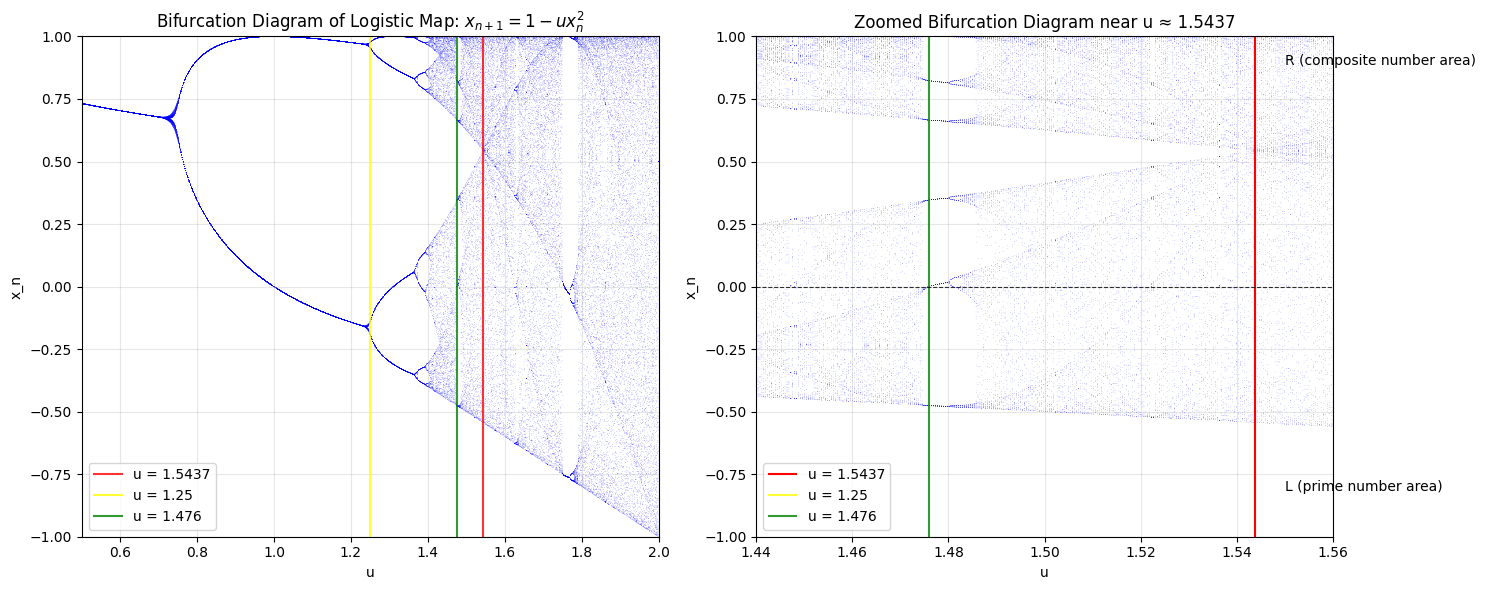

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Logistic mapping: x_{n+1} = 1 - u * x_n^2
def logistic_map(x, u):
    return 1 - u * x**2

# 参数设置
u_min = 0.5
u_max = 2.0
u_steps = 1000
x_init = 0.5  # 初始值
transient = 100  # 烧掉前100个点以达到稳定状态
num_points = 100  # 每个u记录的点数

# 生成u值
u_values = np.linspace(u_min, u_max, u_steps)

# 存储结果
x_data = []
u_data = []

# 生成分岔图数据（左图）
for u in u_values:
    x = x_init
    for _ in range(transient):
        x = logistic_map(x, u)
    for _ in range(num_points):
        x = logistic_map(x, u)
        x_data.append(x)
        u_data.append(u)

# 绘制图形
plt.figure(figsize=(15, 6))

# 左图：全范围分岔图
plt.subplot(1, 2, 1)
plt.scatter(u_data, x_data, s=0.1, c='blue', edgecolors='none')
plt.xlabel('u')
plt.ylabel('x_n')
plt.title('Bifurcation Diagram of Logistic Map: $x_{n+1} = 1 - ux_n^2$')



# 添加黄线 u = 1.25 和绿线 u = 1.476 到左图
plt.axvline(x=1.25, color='yellow', linestyle='-', linewidth=1.5, alpha=0.8, label='u = 1.25')
plt.axvline(x=1.476, color='green', linestyle='-', linewidth=1.5, alpha=0.8, label='u = 1.476')
# 添加特殊红线 u = 1.5437 到左图
u_special = 1.5437
plt.axvline(x=u_special, color='red', linestyle='-', linewidth=1.5, alpha=0.8, label=f'u = {u_special}')

plt.xlim(u_min, u_max)
plt.ylim(-1, 1)
plt.grid(True, alpha=0.3)
plt.legend()

# 右图：局部放大 (u ∈ [1.44, 1.56])
u_local = np.linspace(1.44, 1.56, 300)
x_local_data = []
u_local_data = []

for u in u_local:
    x = x_init
    for _ in range(transient):
        x = logistic_map(x, u)
    for _ in range(num_points):
        x = logistic_map(x, u)
        x_local_data.append(x)
        u_local_data.append(u)

plt.subplot(1, 2, 2)
plt.scatter(u_local_data, x_local_data, s=0.1, c='blue', edgecolors='none')

# 添加红线 u = 1.5437、黄线 u = 1.25 和绿线 u = 1.476 到右图（带标签）
plt.axvline(x=u_special, color='red', linestyle='-', linewidth=1.5, label=f'u = {u_special}')
plt.axvline(x=1.476, color='green', linestyle='-', linewidth=1.5, alpha=0.8, label='u = 1.476')

# 添加水平虚线区分 P 和 C 区域
plt.axhline(y=0, color='black', linestyle='--', alpha=0.8, linewidth=0.8)

# 标注区域
plt.text(1.55, 0.9, 'R (composite number area)', fontsize=10, ha='left', va='center')
plt.text(1.55, -0.8, 'L (prime number area)', fontsize=10, ha='left', va='center')

plt.xlabel('u')
plt.ylabel('x_n')
plt.title('Zoomed Bifurcation Diagram near u ≈ 1.5437')
plt.xlim(1.44, 1.56)
plt.ylim(-1, 1)
plt.grid(True, alpha=0.3)
plt.legend()

# 调整布局
plt.tight_layout()

# 保存整个图形到文件
plt.savefig('bifurcation_diagrams_with_lines.png', dpi=300)  # 您可以更改文件名和dpi

plt.show()